Decision Tree with entropy as measure for selection of attributes.

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("/content/car.data")

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Assuming the last column is the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Splitting the dataset into train and test sets
# Specify the percentages
percentages = [0.6, 0.7, 0.8]

for p in percentages:
    print(f"\nPercentage of data used for training: {p * 100}%")

    # Split data
    train_data, test_data = train_test_split(data, train_size=p, random_state=42)

    # Separate features and target variable for training and testing
    train_X = train_data.iloc[:, :-1]
    train_y = train_data.iloc[:, -1]
    test_X = test_data.iloc[:, :-1]
    test_y = test_data.iloc[:, -1]

    # Train the decision tree classifier
    clf = DecisionTreeClassifier(criterion='entropy')
    clf.fit(train_X, train_y)

    # Predict on train and test sets
    train_pred = clf.predict(train_X)
    test_pred = clf.predict(test_X)

    # Calculate accuracy and F1-score
    train_acc = np.mean(train_pred == train_y)
    test_acc = np.mean(test_pred == test_y)
    f1 = f1_score(test_y, test_pred, average='weighted')

    # Confusion matrix
    cm = confusion_matrix(test_y, test_pred)

    print(f"Train Accuracy: {train_acc}")
    print(f"Test Accuracy: {test_acc}")
    print(f"F1-score: {f1}")
    print("Confusion Matrix:")
    print(cm)



Percentage of data used for training: 60.0%
Train Accuracy: 1.0
Test Accuracy: 0.9710564399421129
F1-score: 0.9714245791346043
Confusion Matrix:
[[148   4   2   2]
 [  3  20   0   1]
 [  6   0 477   0]
 [  0   2   0  26]]

Percentage of data used for training: 70.0%
Train Accuracy: 1.0
Test Accuracy: 0.976878612716763
F1-score: 0.9769980651031037
Confusion Matrix:
[[111   2   3   2]
 [  2  14   0   1]
 [  0   0 361   0]
 [  0   2   0  21]]

Percentage of data used for training: 80.0%
Train Accuracy: 1.0
Test Accuracy: 0.9739884393063584
F1-score: 0.9744071043729031
Confusion Matrix:
[[ 73   2   0   2]
 [  2  12   0   1]
 [  0   0 237   0]
 [  0   2   0  15]]


In [8]:
# Specify the number of repetitions
repetitions = 20

# Specify the percentages
percentages = [0.6, 0.7, 0.8]

# Dictionary to store average accuracies for each percentage split
average_accuracies = {}

for p in percentages:
    print(f"\nPercentage of data used for training: {p * 100}%")

    # List to store accuracies for each repetition
    accuracies = []

    for _ in range(repetitions):
        # Split data
        train_data, test_data = train_test_split(data, train_size=p)

        # Separate features and target variable for training and testing
        train_X = train_data.iloc[:, :-1]
        train_y = train_data.iloc[:, -1]
        test_X = test_data.iloc[:, :-1]
        test_y = test_data.iloc[:, -1]

        # Train the decision tree classifier
        clf = DecisionTreeClassifier(criterion='entropy')
        clf.fit(train_X, train_y)

        # Predict on test set
        test_pred = clf.predict(test_X)

        # Calculate accuracy
        test_acc = np.mean(test_pred == test_y)

        # Append accuracy to list
        accuracies.append(test_acc)

    # Calculate average accuracy
    avg_accuracy = np.mean(accuracies)
    average_accuracies[p] = avg_accuracy

    print(f"Average Test Accuracy: {avg_accuracy}")


Percentage of data used for training: 60.0%
Average Test Accuracy: 0.9686685962373371

Percentage of data used for training: 70.0%
Average Test Accuracy: 0.9783236994219653

Percentage of data used for training: 80.0%
Average Test Accuracy: 0.9816473988439306


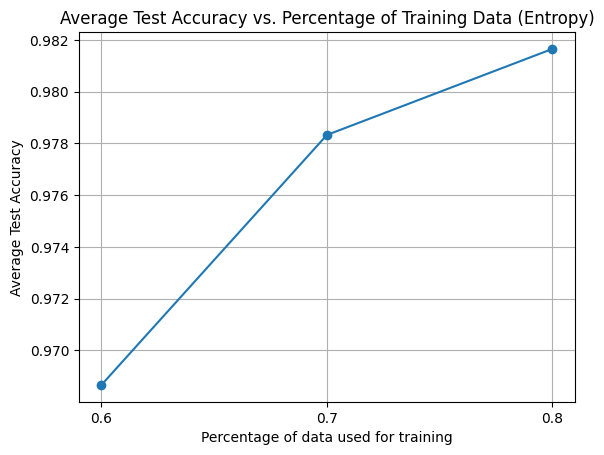

In [25]:
import matplotlib.pyplot as plt

# Plot the graph
plt.plot(list(average_accuracies.keys()), list(average_accuracies.values()), marker='o')
plt.xlabel('Percentage of data used for training')
plt.ylabel('Average Test Accuracy')
plt.title('Average Test Accuracy vs. Percentage of Training Data (Entropy)')
plt.xticks(list(average_accuracies.keys()))
plt.grid(True)
plt.show()


Decision Tree with Gini Index as measure for selection of attributes.

In [9]:
# Splitting the dataset into train and test sets
# Specify the percentages
percentages = [0.6, 0.7, 0.8]

for p in percentages:
    print(f"\nPercentage of data used for training: {p * 100}%")

    # Split data
    train_data, test_data = train_test_split(data, train_size=p, random_state=42)

    # Separate features and target variable for training and testing
    train_X = train_data.iloc[:, :-1]
    train_y = train_data.iloc[:, -1]
    test_X = test_data.iloc[:, :-1]
    test_y = test_data.iloc[:, -1]

    # Train the decision tree classifier with Gini index
    clf = DecisionTreeClassifier(criterion='gini')
    clf.fit(train_X, train_y)

    # Predict on train and test sets
    train_pred = clf.predict(train_X)
    test_pred = clf.predict(test_X)

    # Calculate accuracy and F1-score
    train_acc = np.mean(train_pred == train_y)
    test_acc = np.mean(test_pred == test_y)
    f1 = f1_score(test_y, test_pred, average='weighted')

    # Confusion matrix
    cm = confusion_matrix(test_y, test_pred)

    print(f"Train Accuracy: {train_acc}")
    print(f"Test Accuracy: {test_acc}")
    print(f"F1-score: {f1}")
    print("Confusion Matrix:")
    print(cm)



Percentage of data used for training: 60.0%
Train Accuracy: 1.0
Test Accuracy: 0.9710564399421129
F1-score: 0.9711561150887481
Confusion Matrix:
[[148   3   4   1]
 [  3  20   0   1]
 [  5   0 478   0]
 [  1   2   0  25]]

Percentage of data used for training: 70.0%
Train Accuracy: 1.0
Test Accuracy: 0.976878612716763
F1-score: 0.9768645692231851
Confusion Matrix:
[[112   2   3   1]
 [  2  14   0   1]
 [  0   0 361   0]
 [  1   2   0  20]]

Percentage of data used for training: 80.0%
Train Accuracy: 1.0
Test Accuracy: 0.9710982658959537
F1-score: 0.971561846525402
Confusion Matrix:
[[ 73   2   0   2]
 [  2  12   0   1]
 [  1   0 236   0]
 [  0   2   0  15]]


In [13]:
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("/content/car.data")

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Specify the number of repetitions
repetitions = 20

# Specify the percentages
percentages = [0.6, 0.7, 0.8]

# Dictionary to store average accuracies for each percentage split
average_accuracies_gini = {}

for p in percentages:
    print(f"\nPercentage of data used for training: {p * 100}%")

    # List to store accuracies for each repetition
    accuracies = []

    for _ in range(repetitions):
        # Split data
        train_data, test_data = train_test_split(data, train_size=p, random_state=42)

        # Separate features and target variable for training and testing
        train_X = train_data.iloc[:, :-1]
        train_y = train_data.iloc[:, -1]
        test_X = test_data.iloc[:, :-1]
        test_y = test_data.iloc[:, -1]

        # Train the decision tree classifier with Gini index
        clf = DecisionTreeClassifier(criterion='gini', random_state=42)
        clf.fit(train_X, train_y)

        # Predict on test set
        test_pred = clf.predict(test_X)

        # Calculate accuracy
        test_acc = accuracy_score(test_y, test_pred)

        # Append accuracy to list
        accuracies.append(test_acc)

    # Calculate average accuracy
    avg_accuracy = np.mean(accuracies)
    average_accuracies_gini[p] = avg_accuracy

    print(f"Average Test Accuracy with Gini index: {avg_accuracy}")




Percentage of data used for training: 60.0%
Average Test Accuracy with Gini index: 0.9725036179450075

Percentage of data used for training: 70.0%
Average Test Accuracy with Gini index: 0.9768786127167631

Percentage of data used for training: 80.0%
Average Test Accuracy with Gini index: 0.9710982658959537


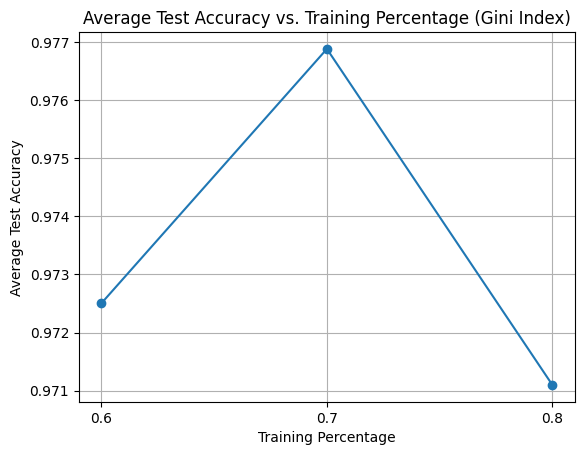

In [24]:
# Plot the graph
plt.plot(percentages, average_accuracies_gini, marker='o')
plt.title('Average Test Accuracy vs. Training Percentage (Gini Index)')
plt.xlabel('Training Percentage')
plt.ylabel('Average Test Accuracy')
plt.xticks(percentages)
plt.grid(True)
plt.show()
